In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59506,48869,0.846847,-0.740109,1.734920,0.973051,-0.908455,1.955373,-1.282036,0.785884,1.530679,...,0.108577,0.830381,0.111284,-0.338765,-0.038436,0.663828,0.107897,0.023937,44.00,0.0
59507,48870,-0.293073,0.287754,1.076909,-1.498707,0.030389,-0.094332,0.592840,-0.236917,-1.592913,...,-0.702190,-1.566421,0.092062,-0.345236,-0.562907,0.566838,-0.462258,-0.231659,26.00,0.0
59508,48870,-2.728620,2.789470,-0.019110,-0.345316,-0.983749,-0.665490,-0.452156,1.174699,0.050815,...,-0.080194,-0.098998,0.034646,-0.090487,0.025606,0.152858,-0.341898,-0.263507,1.99,0.0
59509,48870,-0.118399,1.825136,-0.621394,0.294209,1.095673,-2.164019,1.102808,-1.244775,-0.734142,...,0.595335,-0.750841,-0.418729,0.595806,1.411615,-0.561365,0.139271,0.280751,1.00,0.0
59510,48871,-2.101431,0.822359,0.342028,-0.592551,1.344203,4.774187,0.214765,1.215894,1.024100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Class'].value_counts()

Class
0.0    59348
1.0      162
Name: count, dtype: int64

<Axes: xlabel='Class'>

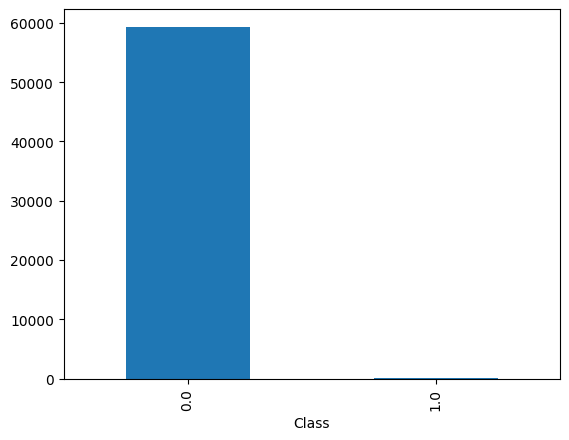

In [ ]:
df['Class'].value_counts().plot.bar()

### Intitially


Step1 -We Will Create an ANN and solve this problem(ROC AUC)


Step2- We will use some Weights handling techniques to solve this imbalanced then we create


The ANN

In [ ]:
len(df.columns)

31

In [ ]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59506,0.846847,-0.740109,1.734920,0.973051,-0.908455,1.955373,-1.282036,0.785884,1.530679,-0.658000,...,-0.179052,0.108577,0.830381,0.111284,-0.338765,-0.038436,0.663828,0.107897,0.023937,44.00
59507,-0.293073,0.287754,1.076909,-1.498707,0.030389,-0.094332,0.592840,-0.236917,-1.592913,0.801238,...,-0.435357,-0.702190,-1.566421,0.092062,-0.345236,-0.562907,0.566838,-0.462258,-0.231659,26.00
59508,-2.728620,2.789470,-0.019110,-0.345316,-0.983749,-0.665490,-0.452156,1.174699,0.050815,0.611769,...,0.415873,-0.080194,-0.098998,0.034646,-0.090487,0.025606,0.152858,-0.341898,-0.263507,1.99
59509,-0.118399,1.825136,-0.621394,0.294209,1.095673,-2.164019,1.102808,-1.244775,-0.734142,-2.355593,...,-0.328575,0.595335,-0.750841,-0.418729,0.595806,1.411615,-0.561365,0.139271,0.280751,1.00


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59506    0.0
59507    0.0
59508    0.0
59509    0.0
59510    NaN
Name: Class, Length: 59511, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
46372,-2.148270,1.164400,1.534972,-0.440380,-0.641093,-0.179181,0.400261,0.170554,1.329372,0.932856,...,0.238957,-0.267645,0.208342,-0.411666,0.587472,0.027456,0.225227,-0.434046,-0.758315,43.84
33052,1.434037,-1.397087,0.613273,-1.530030,-1.702105,0.107977,-1.643270,0.335250,-1.386264,1.639816,...,-0.520409,-0.037217,0.163484,0.012289,-0.384985,0.180969,-0.061129,0.044707,0.004015,12.00
51993,1.199868,0.219480,0.386402,0.636932,-0.525995,-0.895437,-0.099756,0.003090,-0.047511,-0.076155,...,-0.159965,-0.237780,-0.784216,0.158160,0.460399,0.115953,0.068729,-0.034810,0.019805,0.89
2464,-12.168192,-15.732974,-0.376474,3.792613,10.658654,-7.465603,-6.907038,1.573722,0.058164,-0.421881,...,4.469095,1.660209,-0.910516,0.010468,-0.097246,-0.329918,0.225916,0.201802,-2.368534,120.00
1185,-2.842932,-1.138905,0.802236,-0.092841,1.595405,-1.580699,-0.161216,0.263178,-0.340213,-0.745063,...,0.098461,-0.177517,-0.222918,0.994233,-0.053079,0.256120,0.345881,0.199538,-0.008817,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.067227,-2.164620,1.040064,1.212655,-1.807102,0.863734,-0.487016,0.379998,1.199373,-0.460258,...,0.854966,0.352144,0.152385,-0.426997,0.299693,-0.045335,0.528929,-0.060322,0.102029,519.90
38158,1.252832,-0.394117,0.675035,0.070001,-0.924602,-0.314198,-0.596392,0.051904,1.152197,-0.334561,...,-0.093556,-0.003711,0.157498,-0.133752,-0.030233,0.381916,1.216758,-0.054500,0.002612,16.95
860,-0.833568,0.606174,-0.051329,-2.091447,0.968764,-0.030220,0.887288,0.099009,0.834622,-1.031219,...,-0.375235,0.320782,1.239559,0.192074,-0.621025,-0.843584,-0.835690,0.164384,0.274361,9.90
15795,0.995760,0.329196,-0.125429,2.384022,0.297580,-0.296647,0.592852,-0.134976,-1.279734,0.859842,...,0.070545,0.079988,-0.083079,-0.253872,-0.002410,0.697883,0.060729,-0.065928,0.015393,113.75


In [ ]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10289,-2.840134,2.292703,0.250816,-1.009155,-1.159205,0.152733,-1.226357,2.050525,0.769612,-0.929860,...,-0.068648,-0.118481,-0.330098,0.223764,-0.314223,-0.302045,0.677725,0.096961,0.054268,14.97
36013,0.241440,-2.322673,0.372087,0.000801,-1.835550,-0.348860,-0.061386,-0.210470,-0.642705,0.194504,...,1.205874,0.574165,0.548888,-0.474539,0.704163,0.202384,-0.206777,-0.051356,0.118998,559.16
10880,1.294424,-0.512157,-0.546178,-1.696400,1.395499,3.485397,-1.230323,0.877123,2.955589,-1.396175,...,-0.025903,-0.211257,-0.269834,-0.066246,0.957402,0.638362,-0.710530,0.068991,0.023276,6.70
30655,1.129712,-0.882613,0.123639,-1.436424,-1.134138,-1.061311,-0.163970,-0.254108,-0.083379,-0.251968,...,-0.310431,-0.398731,-0.777504,0.047207,0.359697,0.331813,-0.827535,0.068685,0.049358,117.60
9311,1.195890,0.478045,0.424204,1.267782,0.063543,-0.428304,0.113054,-0.225914,1.131575,-0.427396,...,-0.153827,-0.082550,0.123728,-0.072161,0.049536,0.619362,-0.340733,0.008303,0.013219,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47083,1.203625,-0.076630,0.249930,-0.129916,-0.215374,-0.107791,-0.199669,0.073874,-0.050414,-0.018288,...,-0.049926,-0.026443,-0.073085,-0.000978,-0.244072,0.197625,0.978877,-0.069144,-0.010018,15.00
23602,0.809196,-1.396335,-0.339373,-0.404956,-0.915256,-0.425954,0.112549,-0.246664,-1.181382,0.632161,...,0.176566,-0.229771,-0.732550,-0.329762,0.098152,0.362371,1.060094,-0.124747,0.038149,305.65
52841,-0.650203,0.616981,1.026703,0.002706,0.209736,-0.570125,1.133260,-0.313300,-0.053183,-0.220685,...,0.132161,-0.362624,-0.789826,0.200463,-0.224365,-0.072126,0.077664,0.007282,-0.173970,89.99
3610,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.762440,0.593847,0.556451,0.697720,-1.090181,...,0.156089,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.00


In [ ]:
y_train

46372    0.0
33052    0.0
51993    0.0
2464     0.0
1185     0.0
        ... 
54343    0.0
38158    0.0
860      0.0
15795    0.0
56422    0.0
Name: Class, Length: 47608, dtype: float64

In [ ]:
y_test

10289    0.0
36013    0.0
10880    0.0
30655    0.0
9311     0.0
        ... 
47083    0.0
23602    0.0
52841    0.0
3610     0.0
42363    0.0
Name: Class, Length: 11903, dtype: float64

In [ ]:
y_train.value_counts()

Class
0.0    47473
1.0      135
Name: count, dtype: int64

In [ ]:
# Step1

import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
print(len(X.columns))
n_inputs=29

29


In [ ]:
# define model
model=Sequential()

# define hidden layers and visible layers
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))

# define output layer
model.add(Dense(1,activation='sigmoid'))

# define loss and optimizer
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.0837
Epoch 2/10
1488/1488 [==============================] - 2s 2ms/step - loss: 0.0195
Epoch 3/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.0201
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.0089
Epoch 5/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.0274
Epoch 6/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.0090
Epoch 7/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.0071
Epoch 8/10
1488/1488 [==============================] - 2s 2ms/step - loss: 0.0240
Epoch 9/10
1488/1488 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 10/10
1488/1488 [==============================] - 2s 2ms/step - loss: 0.0095


In [ ]:
# Check for missing values in y_test
print(y_test.isnull().sum())

# Handle missing values (example: remove rows with missing values)
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]  # Align X_test with the updated y_test

# Calculate ROC AUC score
y_pred1 = model.predict(X_test)
print(roc_auc_score(y_test, y_pred1))

1
372/372 [==============================] - 1s 1ms/step
0.9619664717348928
